In [59]:
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

from ej1.KohonenGraphics import draw_countries_in_neurons_with_text, draw_avg_distance, draw_umatrix_per_feature, \
    draw_countries_in_neurons
from KohonenNetwork import KohonenNetwork
from _csv import reader
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Grouping Countries
## Parameters
kohonen_net_size => Size of the Kohonen network. It's one value that will vreate a squared matrix
use_weighted_entries => It will define if we use random W initialization or not
kohonen_train_epochs => Times the Kohonen network will train

In [60]:
kohonen_net_size: int = 4
use_weighted_entries: bool = True
kohonen_train_epochs: int = 500 * 7

## Loading data

In [61]:
with open('europe.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    raw_data = list(csv_reader)
    headers =  np.array(raw_data[:1]).T[1:].flatten()
    countries = np.array(raw_data[1:]).T[:1].flatten()
    data = np.array(raw_data[1:]).T[1:].T.astype(float)

## Train the network

In [62]:
net = KohonenNetwork(kohonen_net_size,data, use_weighted_entries)
net.train(kohonen_train_epochs)

## Print

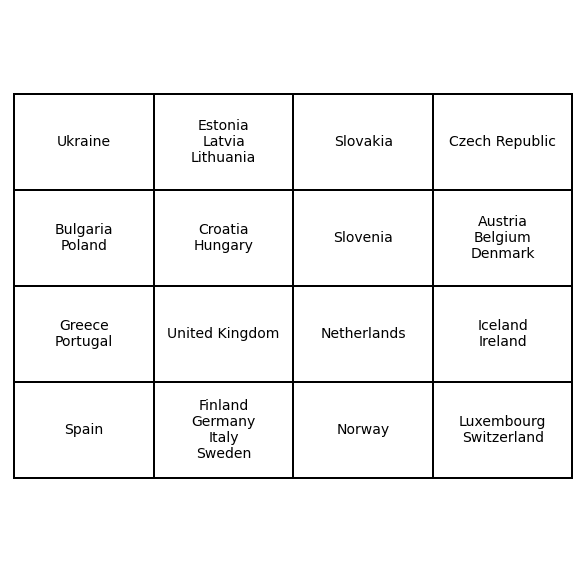

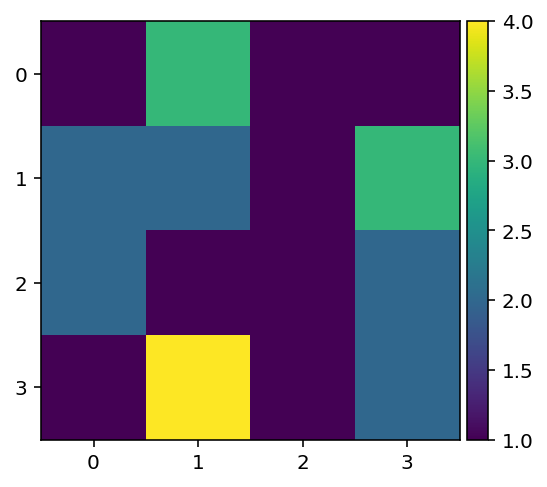

In [63]:
groups = np.empty((kohonen_net_size,kohonen_net_size)).tolist()
for i in range(kohonen_net_size):
    for j in range(kohonen_net_size):
        groups[i][j] = []

for idx,country in enumerate(countries):
    i,j = net.classify(net.values[idx])
    groups[i][j] += [country]

draw_countries_in_neurons_with_text(groups)
draw_countries_in_neurons(groups)

# Distancias promedio entre neuronas

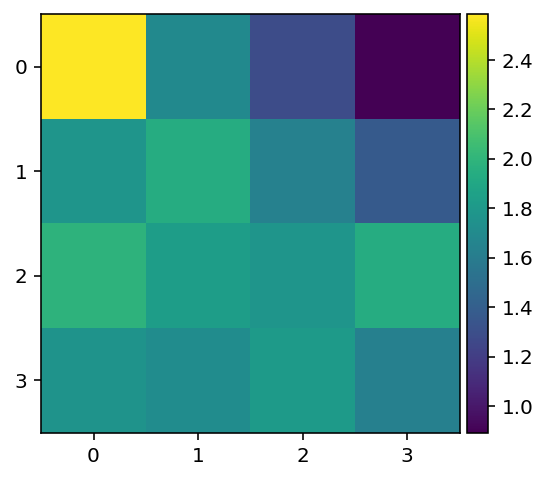

In [66]:
draw_avg_distance(kohonen_net_size, net.distance_matrix())

## Mapas auto organizados

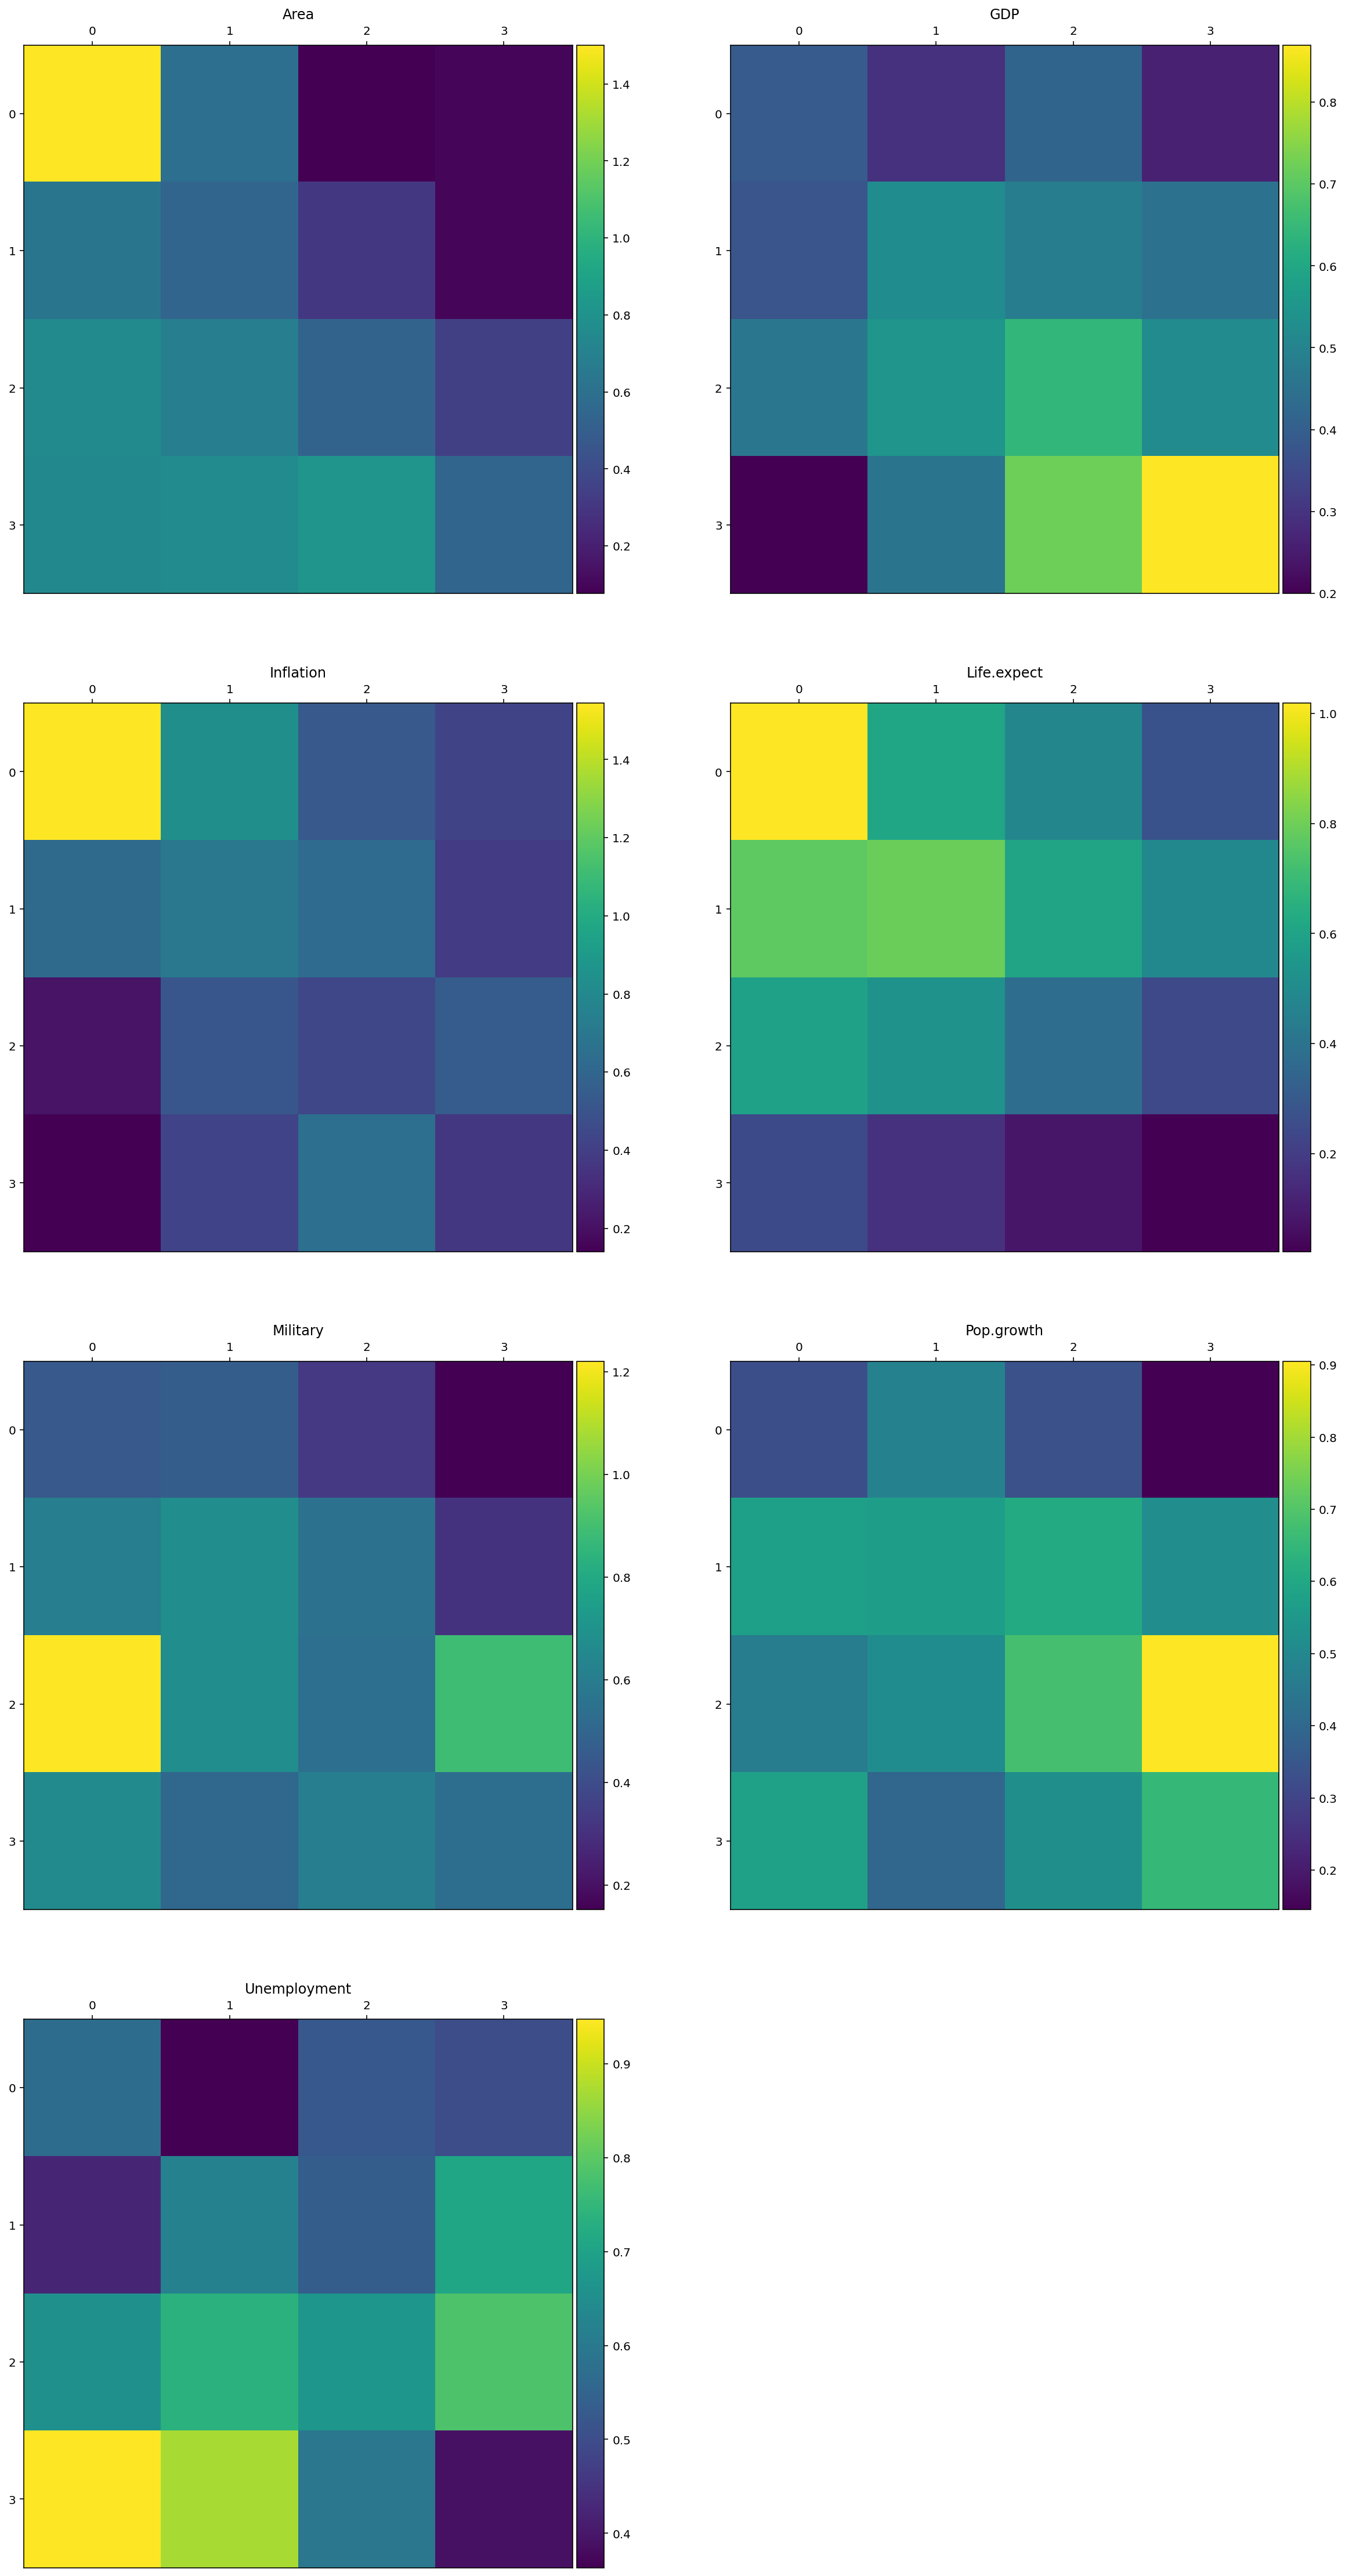

In [65]:
draw_umatrix_per_feature(headers,net,kohonen_net_size)